# Series de tiempo
### Enfoque estadístico

In [4]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

#librerias de series de tiempo
from statsmodels.tsa.stattools import adfuller #dickey-fuller
from statsmodels.graphics.tsaplots import plot_acf #grafica de autocorrelacion
from statsmodels.graphics.tsaplots import plot_pacf #grafica de autocorrelacion parcial
from statsmodels.tsa.arima_process import ArmaProcess #medias moviles

%matplotlib inline 

#no salgan advertencias
import warnings
warnings.filterwarnings('ignore')

## Proceso de ruido blanco ("white noise", "Proceso aleatorio puro")

$Y_t= \varepsilon_t $

donde $\varepsilon_t \sim iid N(\mu=0, \sigma=3) $

In [5]:
#Vamos a definir la semilla
np.random.seed(21)

#
ruido_blanco = np.random.normal(0,3,1000)
ruido_blanco[0]=0

In [7]:
ruido_blanco[:10]

array([ 0.        , -0.33358815,  3.1253904 , -3.77021788,  2.23616304,
       -5.13316128, -0.61759315, -0.70371387,  3.38443213, -0.03787785])

<function matplotlib.pyplot.show(close=None, block=None)>

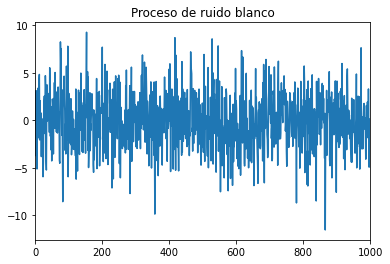

In [15]:
plt.plot(ruido_blanco)
plt.title('Proceso de ruido blanco')
plt.xlim(0,1000)
plt.savefig('ruido_blanco.png')
plt.show

## Vamos a verificar si la serie anterior es un proceso estacionario

In [17]:
result_adf = adfuller(ruido_blanco)

In [19]:
result_adf[1]

0.0

Regla de decisión p-valor < alpha rechazamos Ho

Rrrueba Dickey-fuller 
 
    Ho = No es estacionaria
    Ha = Serie estacionaria

In [24]:
alpha = .05
if result_adf[1]<alpha:
    print(f'La serie es estacionaria, con p-value{result_adf[1]}')
else:
    print(f'La serie es no estacionaria, con p-value{result_adf[1]}')

La serie es estacionaria, con p-value0.0


Paso 2: Definir que tipo de serie estacionario es

ACF (Funcion de autocorrelación)

Text(0.5, 1.0, 'ACF del ruido blanco')

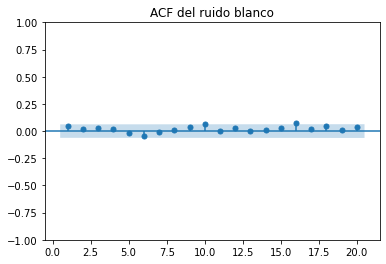

In [28]:
plot_acf(ruido_blanco, zero=False, lags=20)
plt.ylim(-1,1)
plt.title('ACF del ruido blanco')

Text(0.5, 1.0, 'PACF del ruido blanco')

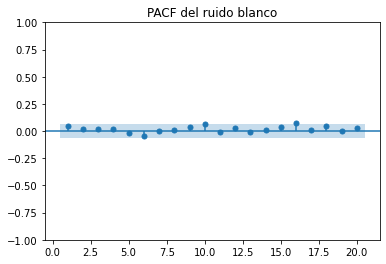

In [30]:
plot_pacf(ruido_blanco, zero=False, lags=20)
plt.ylim(-1,1)
plt.title('PACF del ruido blanco')


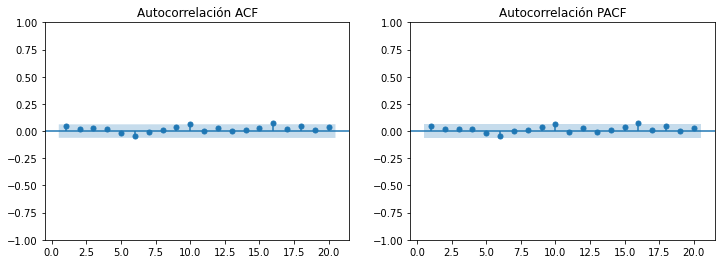

In [33]:
fig, ax= plt.subplots(1,2, figsize=(12,4))
#Primer subgrafica
plot_acf(ruido_blanco, zero=False, lags=20, ax=ax[0],title='Autocorrelación ACF')
ax[0].set_ylim(-1,1)
#Segunda subgrafica
plot_pacf(ruido_blanco, zero=False, lags=20, ax=ax[1],title='Autocorrelación PACF')
ax[1].set_ylim(-1,1)

plt.show
plt.savefig('CorrelogRuidoBlanco.png')

## Proceso autorregresivo de primer orden AR(1)

$Y_t=\phi Y_{t-1}+\varepsilon_t $ donde $\varepsilon_t\sim 
iidN(0,\sigma)$

Vamos a simular $Y_t=0.5Y_{t-1}+\varepsilon_t $


In [35]:
#fijar semilla 
np.random.seed(21)
#construir el Ar(1) como un ARMA(1,0)
ma0 = np.array([1])
ar1 = np.array([1,-0.5])
proceso_ar1 = ArmaProcess(ar1,ma0).generate_sample(1000)

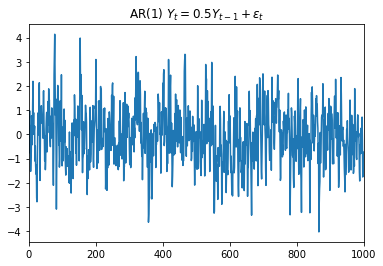

In [37]:
plt.plot(proceso_ar1)
plt.xlim(0,1000)
plt.title(r'AR(1) $Y_t=0.5Y_{t-1}+\varepsilon_t $')
plt.savefig('ar1.png')
plt.show()

## Verificar si la serie es estacionaria

In [42]:
result_adf =adfuller(proceso_ar1)
alpha = .05
if result_adf[1]<alpha:
    print(f'La serie es estacionaria, con p-value={round(result_adf[1],3)}')
else:
    print(f'La serie es no estacionaria, con p-value={round(result_adf[1],3)}')

La serie es estacionaria, con p-value=0.0


## Verificar que tipo de proceso estacionario es 

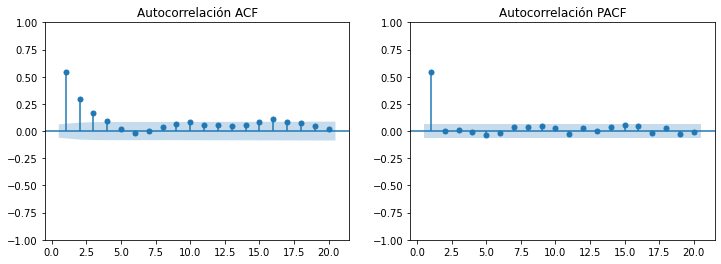

In [43]:
fig, ax= plt.subplots(1,2, figsize=(12,4))
#Primer subgrafica
plot_acf(proceso_ar1, zero=False, lags=20, ax=ax[0],title='Autocorrelación ACF')
ax[0].set_ylim(-1,1)
#Segunda subgrafica
plot_pacf(proceso_ar1, zero=False, lags=20, ax=ax[1],title='Autocorrelación PACF')
ax[1].set_ylim(-1,1)

plt.show
plt.savefig('CorrelogAR1.png')